# Introdunction to Supervised Machine Learning
Supervised learning algorithms are a category of machine learning models that rely on labeled data for training. In supervised learning, the algorithm learns to map inputs to outputs by analyzing a dataset that includes both the input features and the correct corresponding labels (the output). After the model is trained, it can be used to predict the label for new, unseen data.

In Supervised Machine Learning:
- Machines are trained with labelled data as input.
- The Machine learning model identify:
    - Patterns and methods
    - Learn from them
    - Predicts output
    
- Supervised Machine learning algorithms includes:
    - Linear and Logistic regression
    - Multi-class classification
    - Decision trees
    - Support vector machines
    
- Supervised machine learning  is used to detect:
    - Forest fires
    - Oil & gas tragedies
    - Shipping fires
    - Building fires
    
If we use the Supervised machine learning model to detection of fire incident in that case we have to include some parameters like:
- Area spread of fire
- smoke levels
- Temperature
- Rate of increase of spread
- Outcome labelled as fire incident or not

## Algorithms of Supervised Machine learning

Supervised machine have a two types of algorithms:
- Classification
- Regression


### Classification
Classification algorithm segregates data into two or more categories with one or more inputs, a classification model predicts the value of one or more outcomes.

we are use the classification model to segregate the emails into Spam or Ham, so first model examines the data to find patterns and methods to determine whether email is a Ham or a Spam

### Regression
Regression algorithms establishes the relationship between input and output variables which is suitable for situations where the output variable is a real or continuous value.

A regression algorithm is used to forecast or predict the value of the stock market.



# Application of Supervised Machine Learning
- Quality inspection in manufacturing: Inspects quality and classify manufactured products in the good condition or damaged condition.
- Forecasting for the maritme industry
- Fraud protection measurs
- Waste management Systems
- Healthcare
- Marketing and Sales
- Retail and E-Commerce
- Product Recommendation
- Price Optimization

# Preparing and Shaping Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic') # load the titanic data set

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
df['Travelalone'] = np.where((df['sibsp'] + df['parch'])> 0, 0, 1).astype('uint8')

In [7]:
df1 = df.drop(['alive', 'alone', 'who', 'sibsp', 'parch', 'deck', 'class'], axis = 1)

In [8]:
df1.isna().sum()

survived         0
pclass           0
sex              0
age            177
fare             0
embarked         2
adult_male       0
embark_town      2
Travelalone      0
dtype: int64

In [9]:
df['age'].fillna(df1['age'].median(skipna = True), inplace = True)

In [10]:
df1.head()

,survived,pclass,sex,age,fare,embarked,adult_male,embark_town,Travelalone
0,0,3,male,22.0,7.2500,S,True,Southampton,0
1,1,1,female,38.0,71.2833,C,False,Cherbourg,0
2,1,3,female,26.0,7.9250,S,False,Southampton,1
3,1,1,female,35.0,53.1000,S,False,Southampton,0
4,0,3,male,35.0,8.0500,S,True,Southampton,1


In [11]:
df_titanic = pd.get_dummies(df1, columns = ['pclass', 'embarked', 'sex'], drop_first = True)

In [12]:
df_titanic.head()

,survived,age,fare,adult_male,embark_town,Travelalone,pclass_2,pclass_3,embarked_Q,embarked_S,sex_male
0,0,22.0,7.2500,True,Southampton,0,0,1,0,1,1
1,1,38.0,71.2833,False,Cherbourg,0,0,0,0,0,0
2,1,26.0,7.9250,False,Southampton,1,0,1,0,1,0
3,1,35.0,53.1000,False,Southampton,0,0,0,0,1,0
4,0,35.0,8.0500,True,Southampton,1,0,1,0,1,1


In [13]:
df_titanic = df_titanic.drop(['embark_town', 'adult_male'], axis = 1)

In [14]:
df_titanic.head()

,survived,age,fare,Travelalone,pclass_2,pclass_3,embarked_Q,embarked_S,sex_male
0,0,22.0,7.2500,0,0,1,0,1,1
1,1,38.0,71.2833,0,0,0,0,0,0
2,1,26.0,7.9250,1,0,1,0,1,0
3,1,35.0,53.1000,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,1,0,1,1


In [15]:
x = df_titanic.drop(['survived'], axis = 1)
y = df_titanic['survived']

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#### MinMaxScaler:

It transforms features by scaling each feature to a given range, typically between 0 and 1. This is useful when you want all features to be in the same range without changing their distribution.

#### StandardScaler:

This scaler standardizes features by removing the mean and scaling to unit variance (mean = 0 and variance = 1). It is commonly used when the data follows a Gaussian distribution or for algorithms that assume normally distributed data.

In [17]:
trans_MM = MinMaxScaler()
trans_SS = StandardScaler()

In [18]:
df_MM = trans_MM.fit_transform(x)
pd.DataFrame(df_MM)

,0,1,2,3,4,5,6,7
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,1.0
1,0.472229,0.139136,0.0,0.0,0.0,0.0,0.0,0.0
2,0.321438,0.015469,1.0,0.0,1.0,0.0,1.0,0.0
3,0.434531,0.103644,0.0,0.0,0.0,0.0,1.0,0.0
4,0.434531,0.015713,1.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
886,0.334004,0.025374,1.0,1.0,0.0,0.0,1.0,1.0
887,0.233476,0.058556,1.0,0.0,0.0,0.0,1.0,0.0
888,NaN,0.045771,0.0,0.0,1.0,0.0,1.0,0.0
889,0.321438,0.058556,1.0,0.0,0.0,0.0,0.0,1.0


In [19]:
df_SS = trans_SS.fit_transform(x)
pd.DataFrame(df_SS)

,0,1,2,3,4,5,6,7
0,-0.530377,-0.502445,-1.231645,-0.510152,0.902587,-0.307562,0.619306,0.737695
1,0.571831,0.786845,-1.231645,-0.510152,-1.107926,-0.307562,-1.614710,-1.355574
2,-0.254825,-0.488854,0.811922,-0.510152,0.902587,-0.307562,0.619306,-1.355574
3,0.365167,0.420730,-1.231645,-0.510152,-1.107926,-0.307562,0.619306,-1.355574
4,0.365167,-0.486337,0.811922,-0.510152,0.902587,-0.307562,0.619306,0.737695
...,...,...,...,...,...,...,...,...
886,-0.185937,-0.386671,0.811922,1.960202,-1.107926,-0.307562,0.619306,0.737695
887,-0.737041,-0.044381,0.811922,-0.510152,-1.107926,-0.307562,0.619306,-1.355574
888,NaN,-0.176263,-1.231645,-0.510152,0.902587,-0.307562,0.619306,-1.355574
889,-0.254825,-0.044381,0.811922,-0.510152,-1.107926,-0.307562,-1.614710,0.737695


# Overfitting & Underfitting

### Bias
- Bias is an error introduced in the model.
- High bias is a big difference between the actual and predicted values and high basa is not good for our model.
- Low bais indicates that the difference between the actual and predicted values is low.

### Variance
- Variance indicates how scattered data is.
    - High variance indicates more scattered data.
    - Low vairance indicates less scattered data.

## Overfitting
- Overfit indicates a low bias and high variance in the data.
- Overfitting happens when a model focuses on too many details in the training dataset.
    - It has a negative impact on the performance of the model on a new dataset.
    
## Underfitting
- Underfitting is high bias and high variance in the data.
- Underfitting is easily detectable because it exhibit poor performance on the training dataset.
- A model is underfit if it is trained with limited features

**If a model performs well on training data and testing data then we can say our model is good.**

**If a model performs well with training data but not with testing data, it is called as Overfit**

**If a model does not perform well on both training data and testig data, it is called as Underfit**

# Detecting and Preventing Overfitting and Underfitting

In [20]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

In [21]:
X, y = make_classification(n_samples = 9000, n_features=18 ,n_informative= 4, n_redundant= 12, random_state= 4)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [23]:
train_scores, test_scores = list(), list()

In [24]:
values = [i for i in range(1, 21)]

In [25]:
for i in values:
    model = DecisionTreeClassifier(max_depth= i)
    model.fit(X_train, y_train)
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    train_scores.append(train_acc)
    test_scores.append(test_acc)
    print('>>%d, train: %.3f, test: %.3f' %(i, train_acc, test_acc))

>>1, train: 0.840, test: 0.827
>>2, train: 0.856, test: 0.841
>>3, train: 0.888, test: 0.881
>>4, train: 0.908, test: 0.901
>>5, train: 0.921, test: 0.906
>>6, train: 0.931, test: 0.910
>>7, train: 0.949, test: 0.921
>>8, train: 0.959, test: 0.930
>>9, train: 0.966, test: 0.932
>>10, train: 0.976, test: 0.935
>>11, train: 0.983, test: 0.940
>>12, train: 0.987, test: 0.944
>>13, train: 0.991, test: 0.940
>>14, train: 0.994, test: 0.943
>>15, train: 0.996, test: 0.941
>>16, train: 0.998, test: 0.939
>>17, train: 0.999, test: 0.939
>>18, train: 0.999, test: 0.943
>>19, train: 0.999, test: 0.941
>>20, train: 1.000, test: 0.940


#  Ploting the graph of Training and Testing of our model

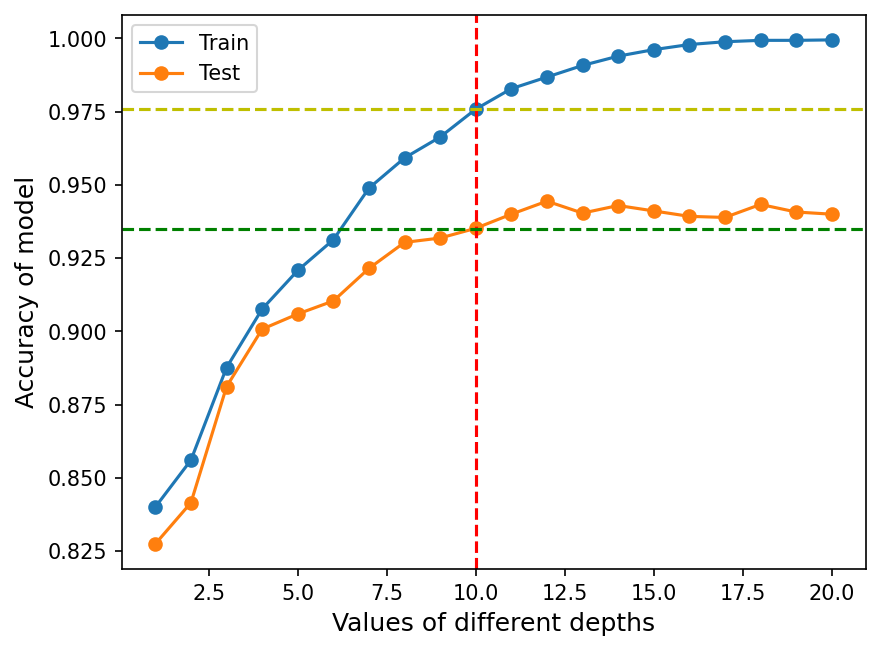

In [53]:
fig, axes = pyplot.subplots(dpi = 150)
pyplot.plot(values, train_scores, '-o', label = 'Train')
pyplot.plot(values, test_scores, '-o', label = 'Test')
pyplot.xlabel('Values of different depths', size = 12)
pyplot.ylabel('Accuracy of model', size = 12)
pyplot.axvline(x = 10, color = 'r', linestyle = '--')
pyplot.axhline(y = 0.935, color = 'g', linestyle = '--') 
pyplot.axhline(y = 0.976, color = 'y', linestyle = '--') 
pyplot.legend()
pyplot.show()

- In above accuracy plot of our model we can see that our model is not perform well in case of tasting data and training data so here it is **Underfitting**
- same as if we see training data our model is perform the 100% accuracy but in the testing data its performance is nearly 93% so this situation is called **Overfitting** 

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid = {'criterion':['gini', 'entropy'], 'max_depth':[2, 4, 6, 10, 20], 'min_samples_split':[5, 10, 20, 50, 100]}
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 3, n_jobs= -1, scoring='accuracy')
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 10, 20],
                         'min_samples_split': [5, 10, 20, 50, 100]},
             scoring='accuracy')

In [39]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_split=10)

In [40]:
print(accuracy_score(y_train, clf.best_estimator_.predict(X_train)))
print(accuracy_score(y_test, clf.best_estimator_.predict(X_test)))

0.97
0.9374074074074074


**We have to use the different models to increse the accuracy to privent the Underfitting**

# Regularization
- Regularization is a form of regression tant shirinks the coefficient towards Zero to redused the complexcity of the data
- Regularization reduces the variance of the model, without increase in bias.
- This method is discourage more complex models and prevents **Overfitting**.
- Fitting involves a loss funciton and known as residual sum of squares(RSS).
    - RSS is nothing but the difference between the actual and predicted value.
    
## Type of Regularization
### 1. Dropout Regularization
   - It works by removing a random selection
   - The more units dropped out, the stronger is regularization.
   - This type of regularization is good for training neural networks.
   
### 2. Early Stopping Regularization
   - Early stopping model uses large number of epochs and plot the validation loss graph. 
   - The training stops and save the model when the validation loss moves from decreasing to increasing

### 3. Co-adaptation Regularization
   - Neurons predict patterns in the training data using output of specific neurons.
   - If the validation data does not have patterns that cause co-adaptation, it could cause **Overfitting**
   - Dropout regularization reduces co-adaptation
   
### 4. Lasso Regression
   - Lasso Regression(L1 regularization) penalizes weights in proportion to the sum of the absolute values of the weights.
   - It is helps to drives the weights of irrelevant or barely relevant features to exactly zero which removes those features from the model
   
### 5. Ridge Regression
   - Ridge regression(L2 regularization) shrinks coefficents close to zero for unimportant predictors, but never make them exactly zero.
   - In other words, the final model will include all predictors.
   
   